In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pandas as pd
import numpy as np

# Initialize Spark session
spark = SparkSession.builder.appName('TemperatureAnalysis').getOrCreate()

# Load the dataset
df = spark.read.csv('GlobalLandTemperaturesByCountry.csv', header=True, inferSchema=True)
df2 = spark.read.csv('GlobalTemperatures.csv', header=True, inferSchema=True)

# Show the first few rows of the dataset
df.show()
df2.show()


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/24 22:42:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+----------+-------------------+-----------------------------+-------+
|        dt| AverageTemperature|AverageTemperatureUncertainty|Country|
+----------+-------------------+-----------------------------+-------+
|1743-11-01| 4.3839999999999995|                        2.294|  Åland|
|1743-12-01|               null|                         null|  Åland|
|1744-01-01|               null|                         null|  Åland|
|1744-02-01|               null|                         null|  Åland|
|1744-03-01|               null|                         null|  Åland|
|1744-04-01|               1.53|                         4.68|  Åland|
|1744-05-01|  6.702000000000001|                        1.789|  Åland|
|1744-06-01| 11.609000000000002|                        1.577|  Åland|
|1744-07-01|             15.342|                         1.41|  Åland|
|1744-08-01|               null|                         null|  Åland|
|1744-09-01|             11.702|                        1.517|  Åland|
|1744-

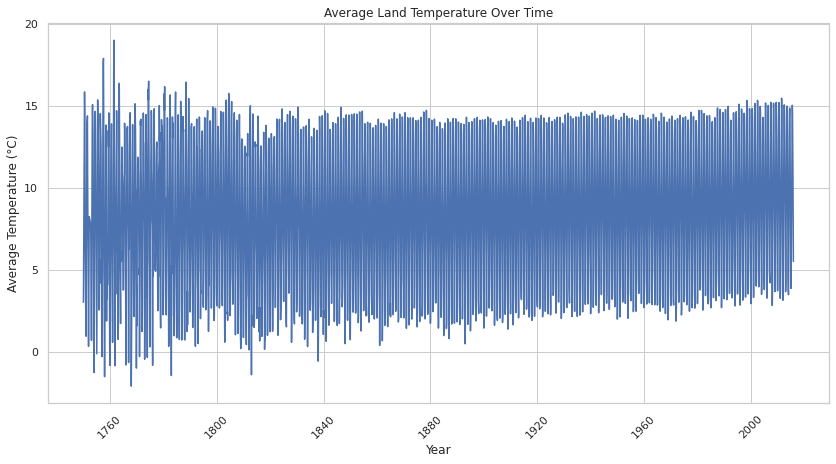

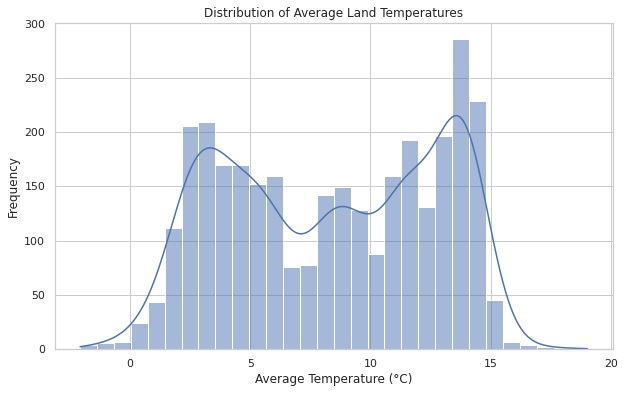

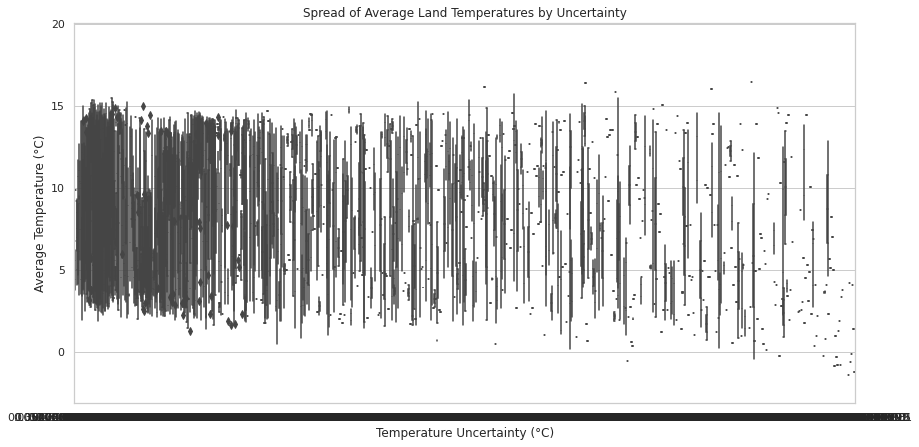

In [2]:
#Visualtion of datset 1 

df_pandas_1 = df2.toPandas()
df_pandas_1['dt'] = pd.to_datetime(df_pandas_1['dt'])

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization styles
sns.set(style="whitegrid")

# Time series plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='dt', y='LandAverageTemperature', data=df_pandas_1)
plt.title('Average Land Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Histogram of temperatures
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas_1['LandAverageTemperature'], bins=30, kde=True)
plt.title('Distribution of Average Land Temperatures')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Box plot of temperatures by uncertainty
plt.figure(figsize=(14, 7))
sns.boxplot(x='LandAverageTemperatureUncertainty', y='LandAverageTemperature', data=df_pandas_1)
plt.title('Spread of Average Land Temperatures by Uncertainty')
plt.xlabel('Temperature Uncertainty (°C)')
plt.ylabel('Average Temperature (°C)')
plt.show()


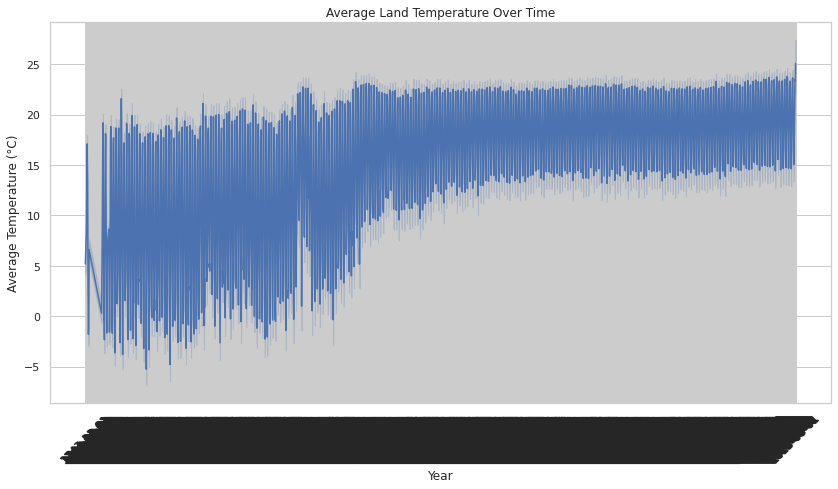

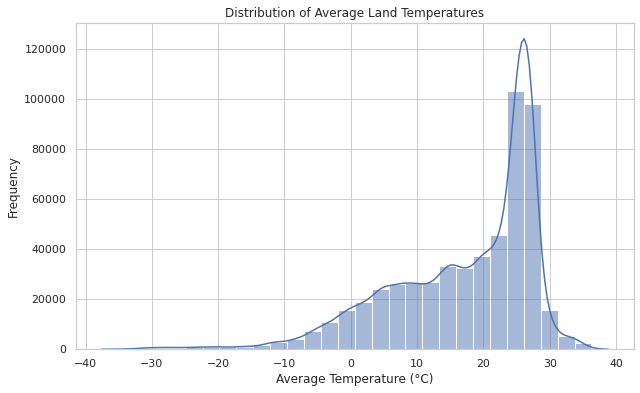

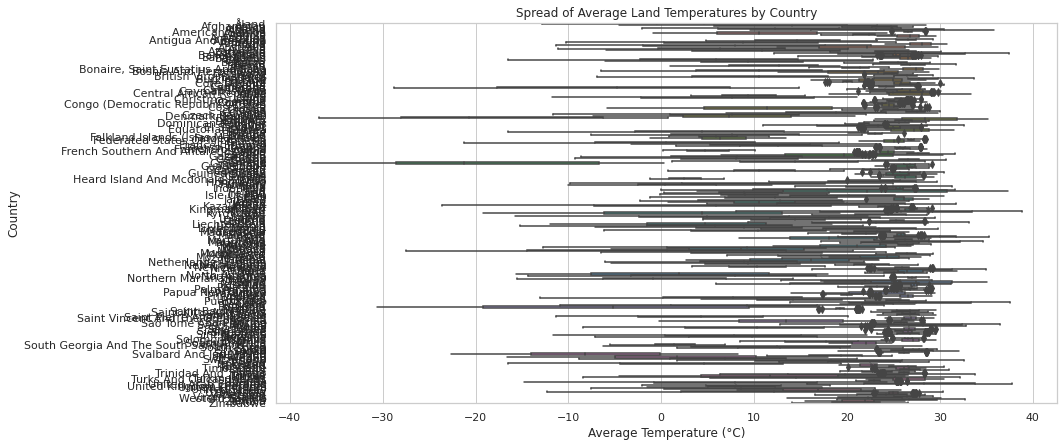

In [3]:
# Convert Spark DataFrame to Pandas DataFrame for visualization
df_pandas = df.toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization styles
sns.set(style="whitegrid")

# Time series plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='dt', y='AverageTemperature', data=df_pandas)
plt.title('Average Land Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Histogram of temperatures
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas['AverageTemperature'], bins=30, kde=True)
plt.title('Distribution of Average Land Temperatures')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Box plot of temperatures by country
plt.figure(figsize=(14, 7))
sns.boxplot(x='AverageTemperature', y='Country', data=df_pandas)
plt.title('Spread of Average Land Temperatures by Country')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Country')
plt.show()


+-----+------------------+-----------------------------+-------+
|   dt|AverageTemperature|AverageTemperatureUncertainty|Country|
+-----+------------------+-----------------------------+-------+
|false|             false|                        false|  false|
|false|              true|                         true|  false|
|false|              true|                         true|  false|
|false|              true|                         true|  false|
|false|              true|                         true|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|              true|                         true|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false

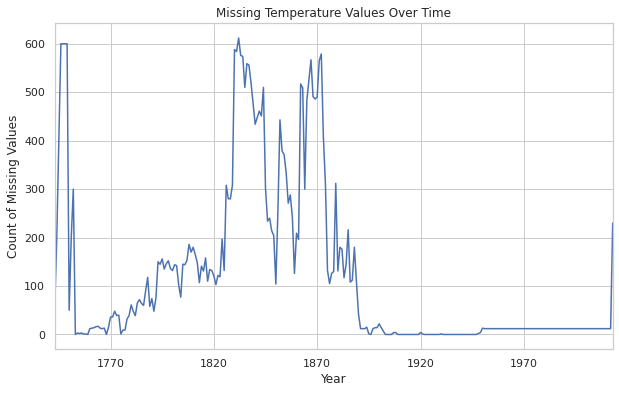

24/05/24 18:13:42 WARN TaskSetManager: Stage 11 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.


+-----+------------------+-----------------------------+-------+
|   dt|AverageTemperature|AverageTemperatureUncertainty|Country|
+-----+------------------+-----------------------------+-------+
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false|                        false|  false|
|false|             false

In [4]:
#Data Preprocessing
# Convert the 'dt' column to datetime
df = df.withColumn('dt', col('dt').cast('timestamp'))

# Check for null values
df.select([col(c).isNull().alias(c) for c in df.columns]).show()

# Plotting missing values over time (Visualize in Pandas after converting to Pandas DataFrame)
pandas_df = df.select("dt", "AverageTemperature").toPandas()
pandas_df['dt'] = pd.to_datetime(pandas_df['dt'])
missing_values = pandas_df.set_index('dt')['AverageTemperature'].isnull().resample('Y').sum()

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
missing_values.plot(ax=ax)
ax.set_title('Missing Temperature Values Over Time')
ax.set_ylabel('Count of Missing Values')
ax.set_xlabel('Year')
plt.show()

# Filter data for years >= 1850
filtered_df = df.filter(year('dt') >= 1870)

# Handle missing values using interpolation (Note: PySpark does not support direct interpolation, so convert to Pandas)
pandas_filtered_df = filtered_df.toPandas()
pandas_filtered_df['AverageTemperature'] = pandas_filtered_df['AverageTemperature'].interpolate(method='linear')
pandas_filtered_df['AverageTemperatureUncertainty'] = pandas_filtered_df['AverageTemperatureUncertainty'].interpolate(method='linear')

# Convert back to Spark DataFrame
filtered_df = spark.createDataFrame(pandas_filtered_df)

# Verify missing values are handled
filtered_df.select([col(c).isNull().alias(c) for c in filtered_df.columns]).show()


24/05/24 18:14:02 WARN TaskSetManager: Stage 12 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.
24/05/24 18:14:04 WARN TaskSetManager: Stage 15 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.


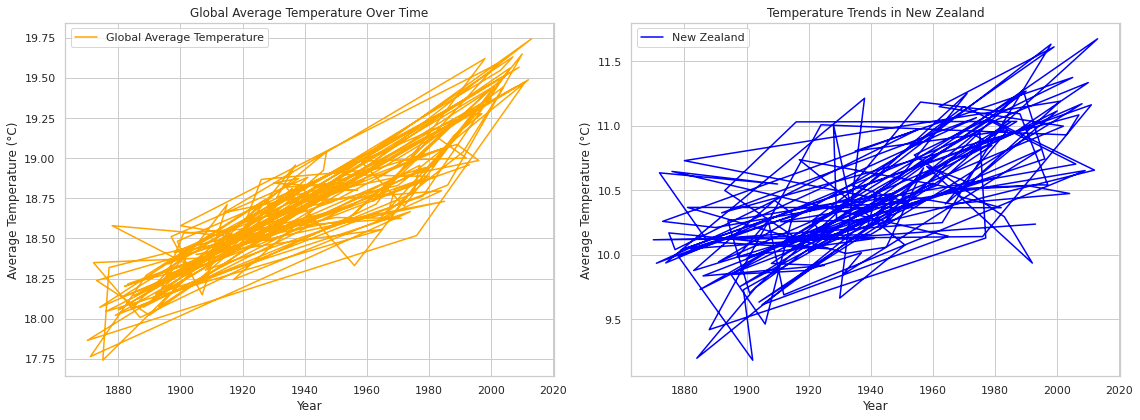

In [5]:
#EDA and Visualization 
# Group by year and calculate the global average temperature
global_avg_temp = filtered_df.groupBy(year('dt').alias('Year')).avg('AverageTemperature')

# Filter data for New Zealand and calculate yearly averages
nz_avg_temp = filtered_df.filter(col('Country') == 'New Zealand').groupBy(year('dt').alias('Year')).avg('AverageTemperature')

# Convert to Pandas for plotting
global_avg_temp_pd = global_avg_temp.toPandas()
nz_avg_temp_pd = nz_avg_temp.toPandas()

# Plotting global and New Zealand temperature trends
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(global_avg_temp_pd['Year'], global_avg_temp_pd['avg(AverageTemperature)'], label='Global Average Temperature', color='orange')
ax[0].set_title('Global Average Temperature Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Temperature (°C)')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(nz_avg_temp_pd['Year'], nz_avg_temp_pd['avg(AverageTemperature)'], label='New Zealand', color='blue')
ax[1].set_title('Temperature Trends in New Zealand')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Temperature (°C)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


24/05/24 21:11:51 WARN TaskSetManager: Stage 24 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.


+----+------------------+----------------------------------+--------+
|Year|             label|avg(AverageTemperatureUncertainty)|features|
+----+------------------+----------------------------------+--------+
|1959|18.864975673066926|                0.3838144718792865|[1959.0]|
|1896|18.341112044817915|                0.7555119047619048|[1896.0]|
|1990|19.345458774314416|                0.3593148148148146|[1990.0]|
|1903| 18.43477083333333|                0.7248583333333338|[1903.0]|
|1884|18.056577052731082|                0.9659561948298615|[1884.0]|
|1975| 18.78160870519006|                0.3599595336076816|[1975.0]|
|1977|18.955841640789806|               0.33099211248285315|[1977.0]|
|1888|  18.0713495559568|                0.9100154548671241|[1888.0]|
|1924|18.621859027777795|                0.5534086805555557|[1924.0]|
|2003| 19.54782453609687|               0.37877434842249635|[2003.0]|
|2007|19.631494453935627|               0.33988957475994497|[2007.0]|
|1892| 18.1526791584

24/05/24 21:11:52 WARN TaskSetManager: Stage 27 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.
24/05/24 21:11:54 WARN TaskSetManager: Stage 28 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.
24/05/24 21:11:54 WARN Instrumentation: [612d90b9] regParam is zero, which might cause numerical instability and overfitting.
24/05/24 21:11:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/24 21:11:55 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
24/05/24 21:11:55 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
24/05/24 21:11:55 WARN TaskSetManager: Stage 31 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.
24/05/24 21:11:56 WARN TaskSetManager: Stage 34 contains a task of very large 

Coefficient: 0.009396486627958103
Intercept: 0.4619793204509091


24/05/24 21:11:57 WARN TaskSetManager: Stage 37 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.


+----+------------------+----------------------------------+--------+------------------+
|Year|             label|avg(AverageTemperatureUncertainty)|features|        prediction|
+----+------------------+----------------------------------+--------+------------------+
|1872|18.349258722454774|                 1.312519669027076|[1872.0]|18.052202287988475|
|1881|18.133924945644345|                0.9705230585606344|[1881.0]|  18.1367706676401|
|1886|18.120893048647744|                0.9374242015032306|[1886.0]| 18.18375310077989|
|1887|18.007207635902336|                0.9058086140137813|[1887.0]| 18.19314958740785|
|1896|18.341112044817915|                0.7555119047619048|[1896.0]| 18.27771796705947|
|1901| 18.53280956500249|                  0.77284114282968|[1901.0]|18.324700400199262|
|1911|18.408202430555562|                0.6089822916666667|[1911.0]|18.418665266478843|
|1912|18.464740972222206|                0.6296590277777777|[1912.0]|  18.4280617531068|
|1915|18.711239930555

24/05/24 21:11:58 WARN TaskSetManager: Stage 40 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.


R2: 0.7450384568349269


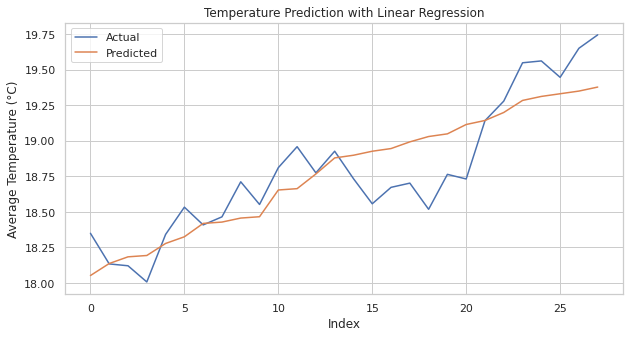

In [14]:
#Regression
# Preparing the data for regression
# Preparing the data for regression
from pyspark.ml.evaluation import RegressionEvaluator
# Preparing the data for regression
yearly_data = filtered_df.withColumn('Year', year('dt'))
yearly_avg_temp = yearly_data.groupBy('Year').agg({'AverageTemperature': 'mean', 'AverageTemperatureUncertainty': 'mean'})

# Assemble features
assembler = VectorAssembler(inputCols=['Year'], outputCol='features')
yearly_avg_temp = assembler.transform(yearly_avg_temp)
yearly_avg_temp = yearly_avg_temp.withColumnRenamed('avg(AverageTemperature)', 'label')

# Verify the "features" column exists
yearly_avg_temp.show()

# Split the data into training and testing sets
train_data, test_data = yearly_avg_temp.randomSplit([0.8, 0.2], seed=20)

# Initialize and train the Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_data)

# Print the coefficients and intercept
print(f"Coefficient: {lr_model.coefficients[0]}")
print(f"Intercept: {lr_model.intercept}")

# Make predictions
predictions = lr_model.transform(test_data)
predictions.show()

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print(f"R2: {r2}")

# Convert predictions to Pandas for visualization
predictions_pd = predictions.select("prediction", "label").toPandas()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(predictions_pd['label'].values, label='Actual')
plt.plot(predictions_pd['prediction'].values, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Prediction with Linear Regression')
plt.legend()
plt.show()


In [16]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the first model
predictions1 = lr_model.transform(test_data)
evaluator1 = lr_model.evaluate(test_data)
rmse1 = evaluator1.rootMeanSquaredError
r2_1 = evaluator1.r2
print(f"Model 1 - RMSE: {rmse1}, R2: {r2_1}")

24/05/24 21:12:38 WARN TaskSetManager: Stage 46 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.


Model 1 - RMSE: 0.23533106106950674, R2: 0.7450384568349269


24/05/23 04:14:49 WARN TaskSetManager: Stage 92 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.


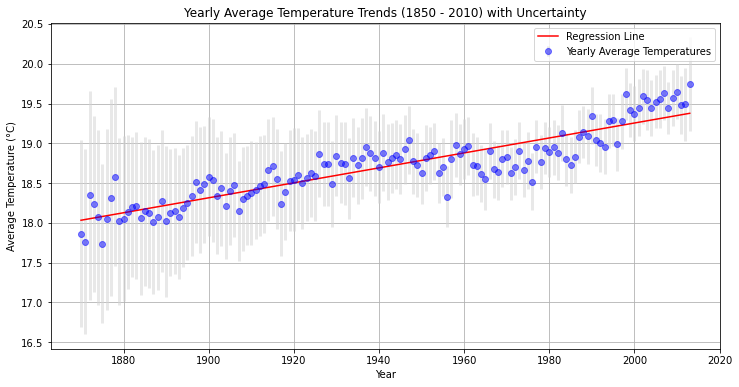

In [15]:
import numpy as np

# Convert the yearly_avg_temp DataFrame to Pandas for plotting
yearly_avg_temp_pd = yearly_avg_temp.toPandas()

# Prepare the data for regression plot
X = yearly_avg_temp_pd['Year'].values.reshape(-1, 1)
Y = yearly_avg_temp_pd['label'].values

# Generate predictions for the plot using a range of years
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_plot_spark = spark.createDataFrame(pd.DataFrame({'Year': X_plot.flatten()}))

# Apply the assembler to create the features column
X_plot_spark = assembler.transform(X_plot_spark)

# Generate predictions
Y_plot = lr_model.transform(X_plot_spark).select('prediction').collect()
Y_plot = [row['prediction'] for row in Y_plot]

# Plotting
plt.figure(figsize=(12, 6))
plt.errorbar(X.flatten(), Y, yerr=yearly_avg_temp_pd['avg(AverageTemperatureUncertainty)'].values, fmt='o', color='blue',
             label='Yearly Average Temperatures', alpha=0.5, ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(X_plot, Y_plot, color='red', label='Regression Line')
plt.title('Yearly Average Temperature Trends (1850 - 2010) with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Calculate statistical measures for global and NZ average temperatures
print(global_avg_temp_pd.describe())
print(nz_avg_temp_pd.describe())

# Calculate correlation between AverageTemperature and AverageTemperatureUncertainty
correlation = filtered_df.stat.corr('AverageTemperature', 'AverageTemperatureUncertainty')
print(f"Correlation between AverageTemperature and AverageTemperatureUncertainty: {correlation}")


              Year  avg(AverageTemperature)
count   144.000000               144.000000
mean   1941.500000                18.707282
std      41.713307                 0.434220
min    1870.000000                17.740900
25%    1905.750000                18.406029
50%    1941.500000                18.718330
75%    1977.250000                18.924862
max    2013.000000                19.744139
              Year  avg(AverageTemperature)
count   144.000000               144.000000
mean   1941.500000                10.430440
std      41.713307                 0.509053
min    1870.000000                 9.182833
25%    1905.750000                10.056396
50%    1941.500000                10.390042
75%    1977.250000                10.781604
max    2013.000000                11.675167


24/05/23 03:58:53 WARN TaskSetManager: Stage 45 contains a task of very large size (8572 KiB). The maximum recommended task size is 1000 KiB.


Correlation between AverageTemperature and AverageTemperatureUncertainty: -0.10417550672039086


In [3]:
#Comparing Models 

from pyspark.sql.functions import col, mean, year, log1p
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Fill missing values in 'AverageTemperature' with the mean value
mean_temp = df.select(mean(col('AverageTemperature'))).collect()[0][0]
df_spark = df.na.fill({'AverageTemperature': mean_temp})

# Ensure the 'dt' column is in datetime format
df_spark = df.withColumn('dt', df_spark['dt'].cast('date'))

# Create additional features
df_spark = df_spark.withColumn('Year', year(col('dt')))
df_spark = df_spark.withColumn('LogAverageTemperature', log1p(col('AverageTemperature')))

# Assemble features
assembler1 = VectorAssembler(inputCols=['Year'], outputCol='features1')
assembler2 = VectorAssembler(inputCols=['Year', 'LogAverageTemperature'], outputCol='features2')

df_spark = assembler1.transform(df_spark)
df_spark = assembler2.transform(df_spark)
df_spark = df_spark.withColumnRenamed('AverageTemperature', 'label')
